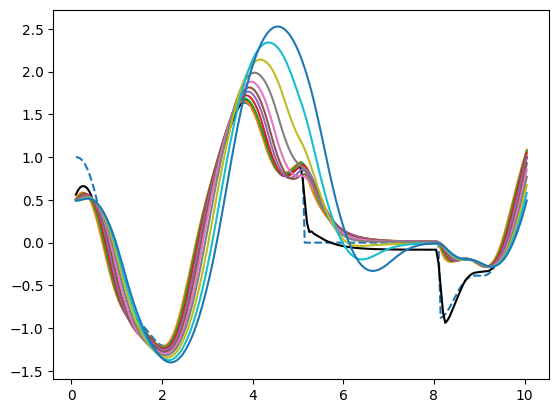

In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np

param = 0.0

def setpoint(t: float): 
    if t > 5 and t < 8 :
        return 0.0
    return -math.sin(t) + math.sin(2.4*t)*0.2 + math.sin(5.3*t)*0.1 + math.cos(t*0.9)**4

    # if t < 5.0:
    #     return 0.0
    # else:
    #     return 1.0


def sim():
    DT = 0.05 # timestep (s)
    DURATION = 10.0 # sim duration (s)

    M = 1.0 # mass (kg)
    F_FS = 3.0 # static friction (N)
    F_FK = 1.5 # kinematic friction (N)

    CONTROL_FORCE = 30.0 # control force limit (N)


    metrics = []

    sp0, sp1 = setpoint(-DT), setpoint(0)
    t, x, v, a = 0.0, 0.5, -0.2, 0.0
    xoff = 0.0
    # metrics.append((t,x,v,a,sp1,(sp1-sp0)/DT,0.0))
    for _ in range(0,int(DURATION/DT)):
        t += DT
        sp2 = setpoint(t)
        tx = sp1
        tv = (sp2-sp0)/(2*DT)
        ta = ((sp2-sp1)-(sp1-sp0))/(DT*DT)
        sp0, sp1 = sp1, sp2

        f = 0

        reaction = controller(x,v,tx,tv,xoff)
        xoff *= math.exp(-DT * 4.0)
        xoff += (tx-x) * DT
        f += max(min(reaction,1),-1) * CONTROL_FORCE

        if abs(v) > 0.005:
            # kinetic friction
            f += -abs(v)/v * F_FK
        else:
            # static friction
            v = 0
            f += -max(min(f,F_FS),-F_FS)

        a = f/M

        v += a * DT/2
        x += v * DT
        v += a * DT/2
        metrics.append((t+DT,x,v,a,tx,tv,ta))
    
    return np.array(metrics)


def controller(px: float, pv: float, tx: float, tv: float, xoff: float):
    P = 1.0
    I = 0.2
    D = 0.5
    return off_up(P*(tx-px) + D*(tv-pv) + I*(xoff), 0.3)

def off_up(x, bump_up):
    return x + bump_up * math.tanh(10*x)

results = sim()
plt.plot(results[:,0],results[:,4],"--")
plt.plot(results[:,0],results[:,1],"k")
for i in range(0,10):
    param += 0.1
    results = sim()
    plt.plot(results[:,0],results[:,1])


# results = sim()
# plt.plot(results[:,0],results[:,1],"r")
# plt.plot(results[:,0],results[:,4],"r--")
# plt.plot(results[:,0],results[:,2],"c")
# plt.plot(results[:,0],np.clip(results[:,5],-3,3),"c--")
# # plt.plot(results[:,0],results[:,3],"b")
# # plt.plot(results[:,0],results[:,6],"b--")
# plt.legend([
#     "x",
#     "target x",
#     "velocity",
#     "target vel",
#     "acceleration",
#     "target acc",
# ])